# Load the datasets

In [1]:
pip install datasets

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 KB 408.7 kB/s eta 0:00:001m387.0 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 KB 2.5 MB/s eta 0:00:003.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 2.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 KB 6.6 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 2.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 KB 6.6 MB/s eta 0:00:00 MB/s eta 0:00:01
  Attempting uninstall: requests
    Found existing installation: requests 2.2

In [12]:
from datasets import load_dataset

ds = load_dataset("google-research-datasets/go_emotions", "simplified")

train_set = ds["train"]
val_set = ds["validation"]
test_set = ds["test"]

## First step: Inspect the dataset

In [14]:
__emotions = [
    'admiration',
    'amusement',
    'anger',
    'annoyance',
    'approval',
    'caring',
    'confusion',
    'curiosity',
    'desire',
    'disappointment',
    'disapproval',
    'disgust',
    'embarrassment',
    'excitement',
    'fear',
    'gratitude',
    'grief',
    'joy',
    'love',
    'nervousness',
    'optimism',
    'pride',
    'realization',
    'relief',
    'remorse',
    'sadness',
    'surprise',
    'neutral'
]

EMOTION_TO_INDEX = {
    emotion: index for index, emotion in enumerate(__emotions)
}

INDEX_TO_EMOTION = {
    index: emotion for emotion, index in EMOTION_TO_INDEX.items()
}

In [15]:
# function to get the number of examples of each emotion in the dataset
def get_emotion_counts(dataset):
    emotion_counts = {}
    for example in dataset:
        for emotion_index in example["labels"]:
            emotion = INDEX_TO_EMOTION[emotion_index]
            if emotion not in emotion_counts:
                emotion_counts[emotion] = 0
            emotion_counts[emotion] += 1
    # sort the emotions in the same order as the __emotions list
    emotion_counts = {emotion: emotion_counts[emotion] for emotion in __emotions}
    return emotion_counts

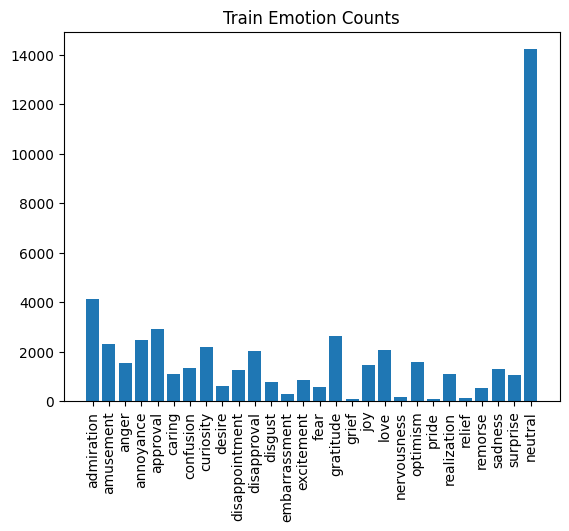

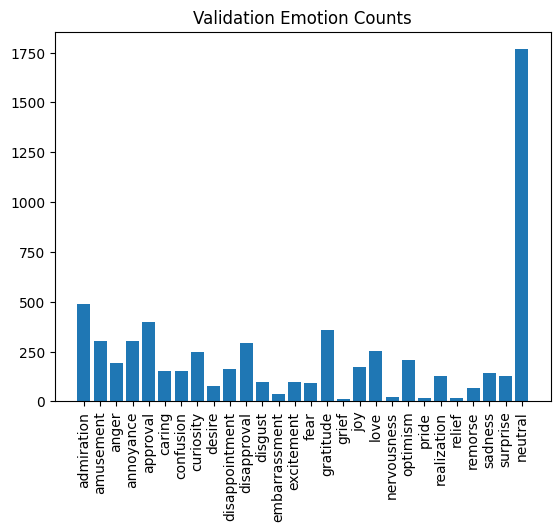

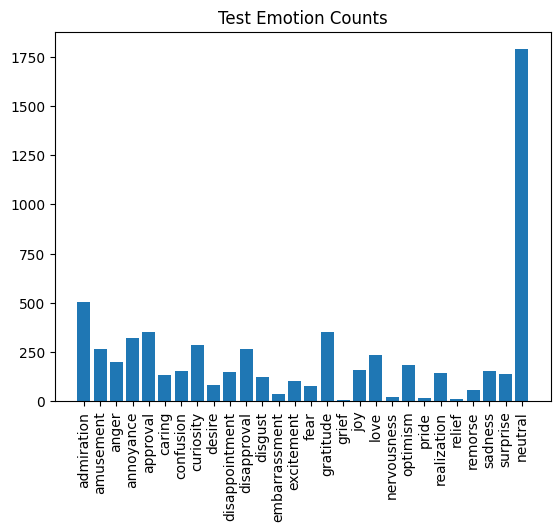

In [16]:
train_emotion_counts = get_emotion_counts(train_set)
val_emotion_counts = get_emotion_counts(val_set)
test_emotion_counts = get_emotion_counts(test_set)

import matplotlib.pyplot as plt

def plot_emotion_counts(emotion_counts, title):
    plt.bar(emotion_counts.keys(), emotion_counts.values())
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

plot_emotion_counts(train_emotion_counts, "Train Emotion Counts")
plot_emotion_counts(val_emotion_counts, "Validation Emotion Counts")
plot_emotion_counts(test_emotion_counts, "Test Emotion Counts")

In [33]:
import spacy

# load the English language model
nlp = spacy.load('en_core_web_sm')

"""
to pre-process the data, we will always apply the following:
- lowercasing
- removing extra whitespaces
"""
def pre_process_naive_bayes(text: str) -> list[str]:
    tokens = nlp(text)
    return [token.lemma_.lower().strip() for token in tokens]

def pre_process_naive_bayes_batch(texts: list[str]) -> list[list[str]]:
    processed_texts = []
    for doc in nlp.pipe(texts, batch_size=1024):  # Adjust batch_size based on memory
        processed_texts.append([token.lemma_.lower().strip() for token in doc])
        print("Processed", len(processed_texts), "texts")
    return processed_texts


texts = [example["text"] for example in train_set]
pre_processed_texts = pre_process_naive_bayes_batch(texts)
pre_processed_test_set = [
    {"text": " ".join(tokens), "labels": train_set[i]["labels"]}
    for i, tokens in enumerate(pre_processed_texts)
]



Processed 1 texts
Processed 2 texts
Processed 3 texts
Processed 4 texts
Processed 5 texts
Processed 6 texts
Processed 7 texts
Processed 8 texts
Processed 9 texts
Processed 10 texts
Processed 11 texts
Processed 12 texts
Processed 13 texts
Processed 14 texts
Processed 15 texts
Processed 16 texts
Processed 17 texts
Processed 18 texts
Processed 19 texts
Processed 20 texts
Processed 21 texts
Processed 22 texts
Processed 23 texts
Processed 24 texts
Processed 25 texts
Processed 26 texts
Processed 27 texts
Processed 28 texts
Processed 29 texts
Processed 30 texts
Processed 31 texts
Processed 32 texts
Processed 33 texts
Processed 34 texts
Processed 35 texts
Processed 36 texts
Processed 37 texts
Processed 38 texts
Processed 39 texts
Processed 40 texts
Processed 41 texts
Processed 42 texts
Processed 43 texts
Processed 44 texts
Processed 45 texts
Processed 46 texts
Processed 47 texts
Processed 48 texts
Processed 49 texts
Processed 50 texts
Processed 51 texts
Processed 52 texts
Processed 53 texts
Pr

## Unigram naive bayes model

In [ ]:
emotion_count_for_words = {}

for example in pre_processed_test_set:
    for word in example["text"].split():
        if word not in emotion_count_for_words:
            emotion_count_for_words[word] = {emotion: 0 for emotion in __emotions}
        for emotion_index in example["labels"]:
            emotion = INDEX_TO_EMOTION[emotion_index]
            emotion_count_for_words[word][emotion] += 1

# put all the counts in percentages
emotion_percentage_for_words = {}
for word, emotion_counts in emotion_count_for_words.items():
    total = sum(emotion_counts.values())
    emotion_percentage_for_words[word] = {emotion: count / total for emotion, count in emotion_counts.items()}

def plot_emotion_counts_for_word(word):
    emotion_counts = emotion_count_for_words[word]
    plt.bar(emotion_counts.keys(), emotion_counts.values())
    plt.title(f"Emotion Counts for Word '{word}'")
    plt.xticks(rotation=90)
    plt.show()


{'admiration': 0.041666666666666664, 'amusement': 0.03125, 'anger': 0.0, 'annoyance': 0.0, 'approval': 0.020833333333333332, 'caring': 0.052083333333333336, 'confusion': 0.020833333333333332, 'curiosity': 0.020833333333333332, 'desire': 0.03125, 'disappointment': 0.010416666666666666, 'disapproval': 0.0, 'disgust': 0.0, 'embarrassment': 0.0, 'excitement': 0.08333333333333333, 'fear': 0.0, 'gratitude': 0.0625, 'grief': 0.0, 'joy': 0.4479166666666667, 'love': 0.020833333333333332, 'nervousness': 0.0, 'optimism': 0.0625, 'pride': 0.0, 'realization': 0.0, 'relief': 0.010416666666666666, 'remorse': 0.020833333333333332, 'sadness': 0.010416666666666666, 'surprise': 0.020833333333333332, 'neutral': 0.03125}
{'admiration': 4, 'amusement': 3, 'anger': 0, 'annoyance': 0, 'approval': 2, 'caring': 5, 'confusion': 2, 'curiosity': 2, 'desire': 3, 'disappointment': 1, 'disapproval': 0, 'disgust': 0, 'embarrassment': 0, 'excitement': 8, 'fear': 0, 'gratitude': 6, 'grief': 0, 'joy': 43, 'love': 2, 'ner

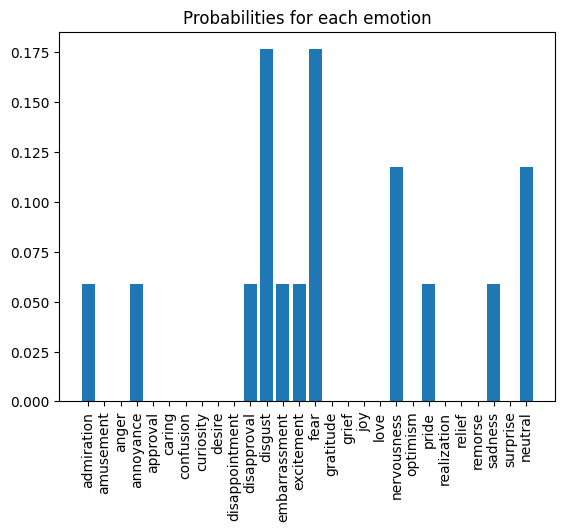

'disgust'

In [52]:
def proba_for_word_in_emotion(word, emotion):
    return emotion_percentage_for_words[word][emotion]


def proba_for_sentence_in_emotion(sentence: list[str], emotion):
    proba = 1
    for word in sentence:
        proba *= proba_for_word_in_emotion(word, emotion)
    return proba

def proba_for_sentence_for_each_emo(sentence: list[str]):
    return {emotion: proba_for_sentence_in_emotion(sentence, emotion) for emotion in __emotions}

def predict_emotion(sentence: str):
    pre_processed = pre_process_naive_bayes(sentence)
    probas = proba_for_sentence_for_each_emo(pre_processed)
    # plot the probabilities
    plt.bar(probas.keys(), probas.values())
    plt.title("Probabilities for each emotion")
    plt.xticks(rotation=90)
    plt.show()
    return max(probas, key=probas.get)

predict_emotion("horrible")

## Bigram naive bayes model

In [ ]:
emotion_count_for_bigrams = {}

for example in pre_processed_test_set:
    words = example["text"].split()
    for i in range(len(words) - 1):
        bigram = (words[i], words[i + 1])
        if bigram not in emotion_count_for_bigrams:
            emotion_count_for_bigrams[bigram] = {emotion: 0 for emotion in __emotions}
        for emotion_index in example["labels"]:
            emotion = INDEX_TO_EMOTION[emotion_index]
            emotion_count_for_bigrams[bigram][emotion] += 1

emotion_count_for_bigrams[("not", "happy")]

# # put all the counts in percentages

emotion_percentage_for_bigrams = {}
for bigram, emotion_counts in emotion_count_for_bigrams.items():
    total = sum(emotion_counts.values())
    emotion_percentage_for_bigrams[bigram] = {emotion: count / total for emotion, count in emotion_counts.items()}
    
def proba_for_bigram_in_emotion(bigram, emotion):
    # if the bigram is not in the data, return 0
    return emotion_percentage_for_bigrams[bigram][emotion]

def proba_for_sentence_in_emotion_bigram(sentence: list[str], emotion):
    proba = 1
    for i in range(len(sentence) - 1):
        bigram = (sentence[i], sentence[i + 1])
        proba *= proba_for_bigram_in_emotion(bigram, emotion)
    return proba

def proba_for_sentence_for_each_emo_bigram(sentence: list[str]):
    return {emotion: proba_for_sentence_in_emotion_bigram(sentence, emotion) for emotion in __emotions}

def predict_emotion_bigram(sentence: str):
    pre_processed = pre_process_naive_bayes(sentence)
    probas = proba_for_sentence_for_each_emo_bigram(pre_processed)
    # plot the probabilities
    plt.bar(probas.keys(), probas.values())
    plt.title("Probabilities for each emotion")
    plt.xticks(rotation=90)
    plt.show()
    return sorted(probas.items(), key=lambda x: x[1], reverse=True)[:3]

data = test_set[1]
print(data["text"], data["labels"])
for i in range(len(data["labels"])):
    print(INDEX_TO_EMOTION[data["labels"][i]])
predict_emotion_bigram(data["text"])

I didn't know that, thank you for teaching me something today! [15]
gratitude


KeyError: ('for', 'teach')